<a href="https://colab.research.google.com/github/nhysmith/4650_HW_5/blob/main/HW_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install spacy
!pip install newsapi-python


In [ ]:
!python -m spacy download en_core_web_lg

     |████████████████████████████████| 827.9 MB 1.2 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [ ]:
import spacy
import en_core_web_lg
nlp_eng = spacy.load('en_core_web_lg')
from newsapi import NewsApiClient
newsapi = NewsApiClient (api_key='18d5c65bfd6e4a94a178b7e6d67f35eb')

In [63]:
articles = []
x = range(1,6)
for i in x:
  temp = newsapi.get_everything(q='coronavirus',
                                      from_param='2021-09-22',
                                      to='2021-10-22',
                                      language='en',
                                      sort_by='relevancy',
                                      page=i)
  print(temp)
  articles.append(temp)

{'status': 'ok', 'totalResults': 43486, 'articles': [{'source': {'id': None, 'name': 'New York Times'}, 'author': 'Emma G. Fitzsimmons, Joseph Goldstein and Sharon Otterman', 'title': "New York City Mandates Vaccines for Its Workers to ‘End the Covid Era'", 'description': 'Mayor Bill de Blasio says 46,000 unvaccinated city workers must get a coronavirus shot by November or lose their paychecks.', 'url': 'https://www.nytimes.com/2021/10/20/nyregion/nyc-vaccine-mandate.html', 'urlToImage': 'https://static01.nyt.com/images/2021/10/20/nyregion/20nymandate/20nymandate-facebookJumbo.jpg', 'publishedAt': '2021-10-20T20:50:14Z', 'content': 'Gregory Floyd, president of Teamsters Local 237, which represents approximately 7,400 employees in the public housing system, where just six in 10 workers are vaccinated, said he believes many worker… [+1725 chars]'}, {'source': {'id': None, 'name': 'New York Times'}, 'author': 'The New York Times', 'title': 'Most U.S. Health Workers Comply With Vaccine Man

In [64]:
import pickle
filename = 'articlesCOVID.pckl'
pickle.dump(articles, open(filename, 'wb'))

filename = 'articlesCOVID.pckl'
loaded_model = pickle.load(open(filename, 'rb'))

filepath = '/content/articlesCOVID.pckl'
pickle.dump(loaded_model, open(filepath, 'wb'))

In [65]:
import pandas as pd

df = pd.DataFrame(temp['articles']) 
df = df.dropna()
df.head()

print(articles)

[{'status': 'ok', 'totalResults': 43486, 'articles': [{'source': {'id': None, 'name': 'New York Times'}, 'author': 'Emma G. Fitzsimmons, Joseph Goldstein and Sharon Otterman', 'title': "New York City Mandates Vaccines for Its Workers to ‘End the Covid Era'", 'description': 'Mayor Bill de Blasio says 46,000 unvaccinated city workers must get a coronavirus shot by November or lose their paychecks.', 'url': 'https://www.nytimes.com/2021/10/20/nyregion/nyc-vaccine-mandate.html', 'urlToImage': 'https://static01.nyt.com/images/2021/10/20/nyregion/20nymandate/20nymandate-facebookJumbo.jpg', 'publishedAt': '2021-10-20T20:50:14Z', 'content': 'Gregory Floyd, president of Teamsters Local 237, which represents approximately 7,400 employees in the public housing system, where just six in 10 workers are vaccinated, said he believes many worker… [+1725 chars]'}, {'source': {'id': None, 'name': 'New York Times'}, 'author': 'The New York Times', 'title': 'Most U.S. Health Workers Comply With Vaccine Ma

In [66]:
dados = []
for i, article in enumerate(articles):
    for x in article['articles']:
        title = x['title']
        date = x['publishedAt']
        description = x['description']
        content = x['content']
        dados.append({'title':title, 'date':date, 'desc':description, 'content':content})
df = pd.DataFrame(dados)
df = df.dropna()
df.head()

,title,date,desc,content
0,New York City Mandates Vaccines for Its Worker...,2021-10-20T20:50:14Z,"Mayor Bill de Blasio says 46,000 unvaccinated ...","Gregory Floyd, president of Teamsters Local 23..."
1,Most U.S. Health Workers Comply With Vaccine M...,2021-09-29T09:24:17Z,Although some have quit their jobs rather than...,Hundreds of sought-after nurses are leaving so...
2,Experts Call for U.S. Vaccination Push as Cold...,2021-10-08T10:02:38Z,Experts say that steady inoculation rates are ...,"LiveUpdated Oct. 8, 2021, 5:56 a.m. ET\r\nOct...."
3,New York Hospitals Face Possible Mass Firings ...,2021-09-24T21:01:26Z,"With a Monday deadline looming, thousands of h...",New York States vaccination requirement for he...
4,The State of the Pandemic,2021-10-07T10:00:07Z,What can the U.S. expect from the coronavirus ...,Apoorva Mandavilli contributed reporting.\r\nT...


In [67]:
import string
pos_tag = {'VERB', 'NOUN', 'PROPN'}

def get_keywords_eng(text):
  result = []
  for token in nlp_eng(text):
    if (token.text in nlp_eng.Defaults.stop_words or token.text in string.punctuation):
      continue
    if (token.pos_ in pos_tag):
      result.append(token.text)

  return result


In [68]:
from collections import Counter
results = []
for content in df.content.values:
    results.append([('#' + x[0]) for x in Counter(get_keywords_eng(content)).most_common(5)])
df['keywords'] = results

In [69]:
print(results)

[['#Gregory', '#Floyd', '#president', '#Teamsters', '#Local'], ['#Hundreds', '#sought', '#nurses', '#leaving', '#U.S.'], ['#Oct.', '#a.m.', '#ET', '#LiveUpdated', '#Experts'], ['#States', '#New', '#York', '#vaccination', '#requirement'], ['#Apoorva', '#Mandavilli', '#contributed', '#reporting', '#Daily'], ['#JASA', '#organization', '#serving', '#adults', '#New'], ['#advisers', '#Centers', '#Disease', '#Control', '#Prevention'], ['#summer', '#coronavirus', '#signs', '#concert', '#business'], ['#Expo', '#opened', '#Image', '#caption', '#ceremony'], ['#Mr.', '#Rivera', '#said', '#Mercados', '#brother'], ['#report', '#committee', '#scheduled', '#release', '#Wednesday'], ['#overlap', '#plan', '#mayor', '#Bill', '#de'], ['#Jersey', '#Shore', '#Ocean', '#County', '#Mr.'], ['#Reached', '#performance', '#Spino', '#said', '#checkers'], ['#Washington', '#State', '#troopers', '#Tuesday', '#dozen'], ['#percent', '#Black', '#New', '#Yorkers', '#gotten'], ['#decision', '#require', '#vaccination', '#s

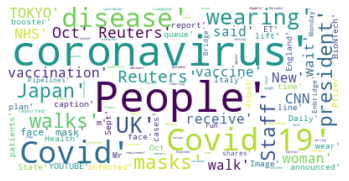

In [70]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = str(results)
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [71]:
f = open("dataset.txt", "w")
for i in results:
  f.write(str(i))
  f.write('\n')
f.close()